In [12]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
model = pybamm.lithium_ion.DFN()

param = model.default_parameter_values

param

{'Ambient temperature [K]': 298.15,
 'Boltzmann constant [J.K-1]': 1.380649e-23,
 'Bulk solvent concentration [mol.m-3]': 2636.0,
 'Cation transference number': 0.4,
 'Cell cooling surface area [m2]': 0.0569,
 'Cell volume [m3]': 7.8e-06,
 'Contact resistance [Ohm]': 0,
 'Current function [A]': 0.680616,
 'EC diffusivity [m2.s-1]': 2e-18,
 'EC initial concentration in electrolyte [mol.m-3]': 4541.0,
 'Edge heat transfer coefficient [W.m-2.K-1]': 0.3,
 'Electrode height [m]': 0.137,
 'Electrode width [m]': 0.207,
 'Electrolyte conductivity [S.m-1]': <function electrolyte_conductivity_Capiglia1999 at 0x0000022467B74400>,
 'Electrolyte diffusivity [m2.s-1]': <function electrolyte_diffusivity_Capiglia1999 at 0x0000022467B744A0>,
 'Electron charge [C]': 1.602176634e-19,
 'Faraday constant [C.mol-1]': 96485.33212,
 'Ideal gas constant [J.K-1.mol-1]': 8.314462618,
 'Initial concentration in electrolyte [mol.m-3]': 1000.0,
 'Initial concentration in negative electrode [mol.m-3]': 19986.6095950

In [14]:
param["Separator porosity"] = 0.5

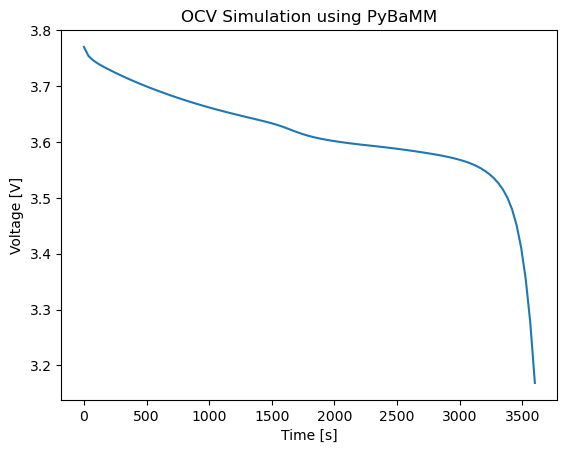

In [36]:
# 创建仿真器并运行仿真
solver = pybamm.CasadiSolver(
        mode="safe", 
        atol=1e-1, 
        rtol=1e-1, 
        dt_max=0.01,  # Decrease the maximum time step
        max_step_decrease_count=2000  # Increase in step size decrease in frequency
    )
# Creating a Simulation
sim = pybamm.Simulation(model, parameter_values=param, solver=solver)
sim.solve([0, 3600])
# 提取仿真结果
solution = sim.solution
voltage = solution["Terminal voltage [V]"].entries
time = solution["Time [s]"].entries

# 将结果保存到DataFrame中
df = pd.DataFrame({"Time [s]": time, "OCV [V]": voltage})

# 将DataFrame保存为CSV文件
# df.to_csv("default_ocv.csv", index=False)
# 绘制OCV数据
plt.plot(time, voltage)
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.title("OCV Simulation using PyBaMM")
plt.show()

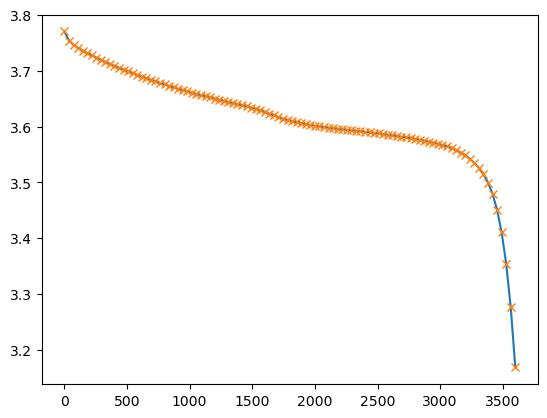

In [37]:
fig, ax = plt.subplots()
ax.plot(time, voltage)
ax.plot(time, voltage, "x")